## 1. Gradient Descent in general

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(10)
Y = (X-5)**2
print(X, Y)

[0 1 2 3 4 5 6 7 8 9] [25 16  9  4  1  0  1  4  9 16]


#### Visualization

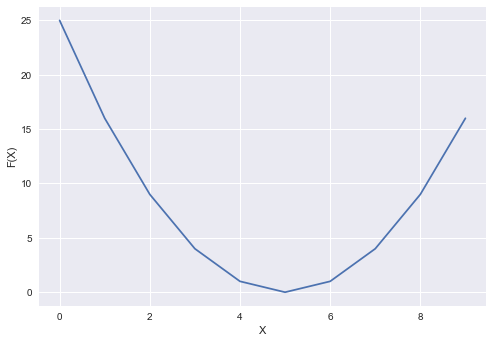

In [3]:
plt.style.use("seaborn")
plt.figure()
plt.plot(X,Y)
plt.ylabel("F(X)")
plt.xlabel("X")
plt.show()

1.0
1.8
2.4400000000000004
2.9520000000000004
3.3616
3.68928
3.9514240000000003
4.1611392
4.32891136
4.4631290880000005
4.570503270400001
4.65640261632
4.725122093056
4.7800976744448
4.82407813955584
4.859262511644672
4.8874100093157375
4.90992800745259
4.927942405962073
4.942353924769658
4.953883139815726
4.9631065118525814
4.9704852094820655
4.976388167585652
4.981110534068522
4.984888427254818
4.987910741803854
4.990328593443083
4.992262874754466
4.993810299803573
4.995048239842858
4.996038591874287
4.996830873499429
4.9974646987995435
4.997971759039634
4.9983774072317075
4.998701925785366
4.998961540628293
4.999169232502634
4.999335386002107
4.999468308801686
4.9995746470413485
4.999659717633079
4.9997277741064625
4.99978221928517
4.999825775428136
4.999860620342509
4.999888496274007
4.999910797019206
4.999928637615365


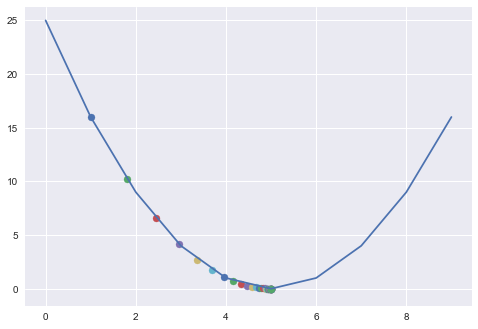

In [4]:
x = 0
lr = 0.1
error = []
plt.plot(X,Y)

# 50 steps in downhill direction
for i in range(50):
    gradient = 2*(x-5) #differentiation of the function
    x = x - lr*gradient
    e = (x-5)**2
    error.append(e)
    plt.scatter(x, e)
    print(x)

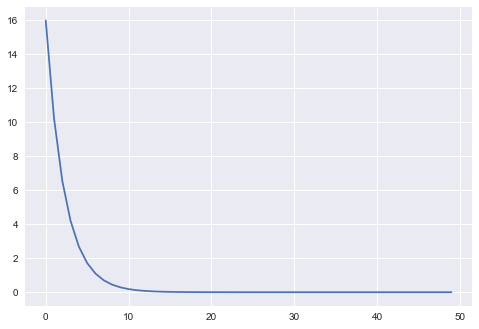

In [5]:
# plot the values if error
plt.plot(error)

#### Gradient Descent:
- It's a method to minimize an error
- find local minima in any function

## 2. Data Preparation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Steps
- Download
- Load
- Visualise
- Normalisation

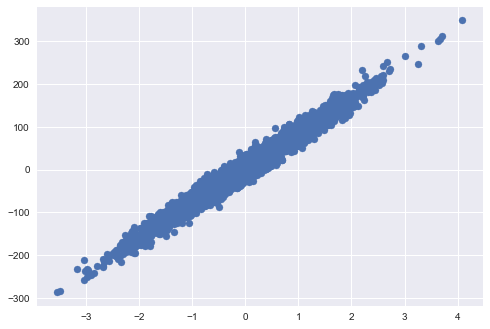

In [7]:
# Load
X = pd.read_csv("./Linear_X_Train.csv")
y = pd.read_csv("./Linear_Y_Train.csv")

# convert x and y into numpy arrays

X = X.values
y = y.values

# Visualize the data
plt.style.use("seaborn")
plt.scatter(X,y)
plt.show()

In [8]:
# Normalization

u = X.mean()
std = X.std()
print(u, std)

-0.03779466168006855 0.9920801322508517


In [9]:
X = (X-u)/std

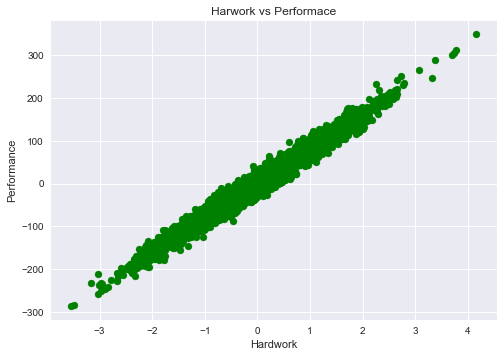

In [10]:
plt.figure()
plt.style.use("seaborn")
plt.title("Harwork vs Performace")
plt.scatter(X,y, color="green")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

### Linear Regression

In [11]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X,Y,theta):
    
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m

def gradientDescent(X,Y,max_steps = 100, learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        # Compute Grad
        grad = gradient(X,Y, theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        #update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
        
    return theta,error_list,theta_list

In [12]:
theta,error_list,theta_list = gradientDescent(X,y)

In [13]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

In [14]:
theta

array([ 0.6838508 , 79.90361453])

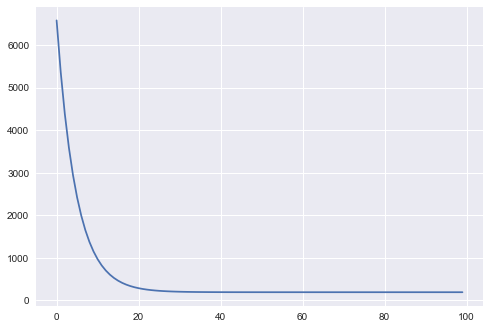

In [15]:
plt.plot(error_list)

## 3. Prediction and Best Lines

In [16]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


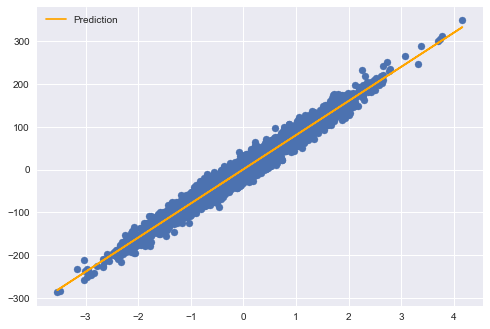

In [17]:
plt.scatter(X,y)
plt.plot(X,y_,color="orange",label="Prediction")
plt.legend()
plt.show()

In [18]:
X_test = pd.read_csv("Linear_X_Test.csv").values
y_test = hypothesis(X_test,theta)

In [19]:
df = pd.DataFrame(data = y_test,columns=["y"])

In [20]:
df.to_csv("y_prediction.csv",index=False)

## 4. Surface plots and Contorous Plot

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [22]:
a = [1,2,3]
b = [4,5,6,7]

a,b = np.meshgrid(a,b)
print(a)
print(b)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


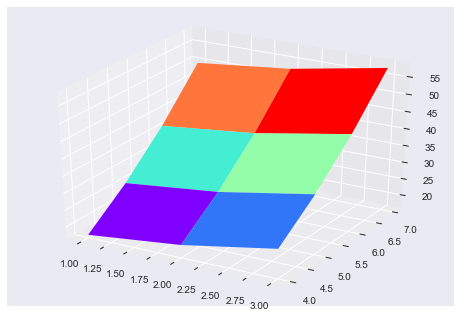

In [23]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow')
plt.show()

In [24]:
a = np.arange(-1,1,0.02)
b = a

a,b = np.meshgrid(a,b)

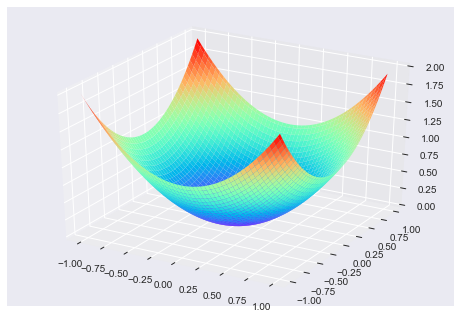

In [25]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(a,b,a**2+b**2,cmap="rainbow")
plt.show()

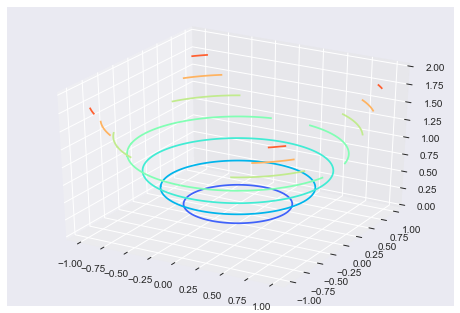

In [26]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(a,b,a**2+b**2,cmap="rainbow")
plt.show()

## 5. Visualizing Loss Function, Gradient Descent, Theta Updates

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [28]:
theta

array([ 0.6838508 , 79.90361453])

In [30]:
# Loss Actually

T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

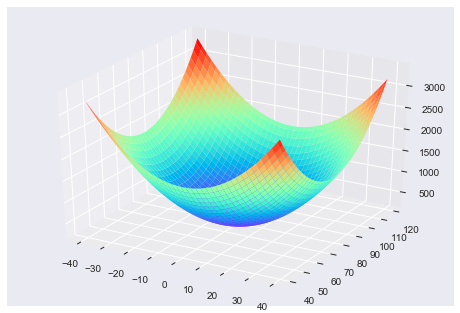

In [31]:
# Visualize the J (Loss)

fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(T0,T1,J,cmap="rainbow")
plt.show()

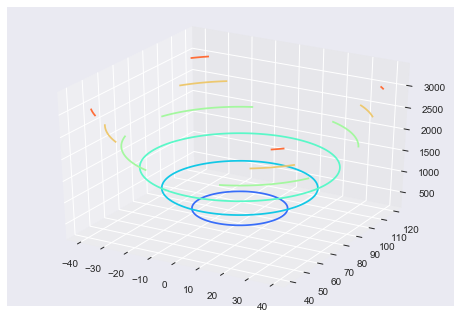

In [32]:
# Visualize the J (Loss)

fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0,T1,J,cmap="rainbow")
plt.show()

### Plot the changes in Values of Theta

In [33]:
theta_list = np.array(theta_list)

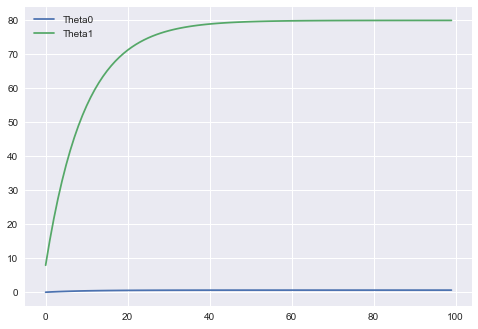

In [34]:
plt.figure()
plt.plot(theta_list[:,0],label = "Theta0")
plt.plot(theta_list[:,1],label = "Theta1")
plt.legend()
plt.show()

## Trajectory Traced by Theta Updates in the Loss Function

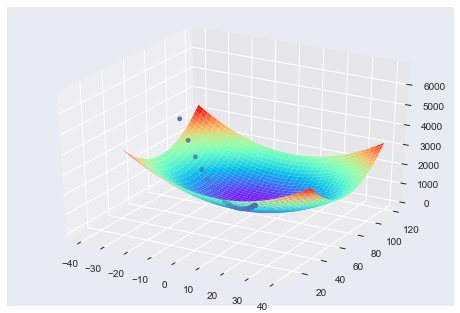

In [35]:
# Visualize the J (Loss)

fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(T0,T1,J,cmap="rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

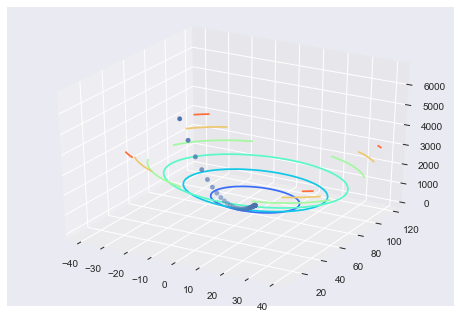

In [36]:
# Visualize the J (Loss)

fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0,T1,J,cmap="rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

### 2D Contour Plot

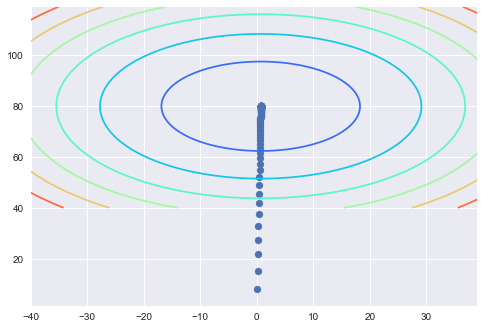

In [41]:
plt.contour(T0,T1,J,cmap="rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [42]:
# To save the data in File we can use

np.save("ThetaList.npy",theta_list)